In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data

In [ ]:
data = pd.read_csv('/content/0050.csv')

# Visualize the data
print(data.head())
data.plot(x='date', y=['capacity', 'turnover', 'change', 'transaction', 'open', 'high', 'low', 'close'], subplots=True, layout=(4, 2), figsize=(10, 10))
plt.show()

# Preprocess the data

## Datetime formatting

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

## Select features and target

In [ ]:
features = ['capacity', 'turnover', 'change', 'transaction', 'open', 'high', 'low']
target = 'close'

## Normalize the data

In [ ]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

## Convert to numpy arrays

In [ ]:
X = data[features].values
y = data[target].values

## Create sequences

In [ ]:
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X, y, seq_length)

## Split into train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the RNN model

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(features)), return_sequences=False))
model.add(Dense(1))

## Compile the model

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

## Train the model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

         date  capacity    turnover  change  transaction    open    high  \
0  2024-01-02   6283610   848793104   -0.55        10013  135.60  135.95   
1  2024-01-03  14783894  1963126583   -2.35        25258  133.70  133.90   
2  2024-01-04   4838660   641202865   -0.05         7094  132.55  132.75   
3  2024-01-05   4566320   604475455   -0.35        12744  132.55  132.95   
4  2024-01-08   9657556  1285524342    0.60         9876  133.00  133.60   

      low   close  
0  134.65  134.90  
1  132.30  132.55  
2  132.30  132.50  
3  132.10  132.15  
4  132.75  132.75  


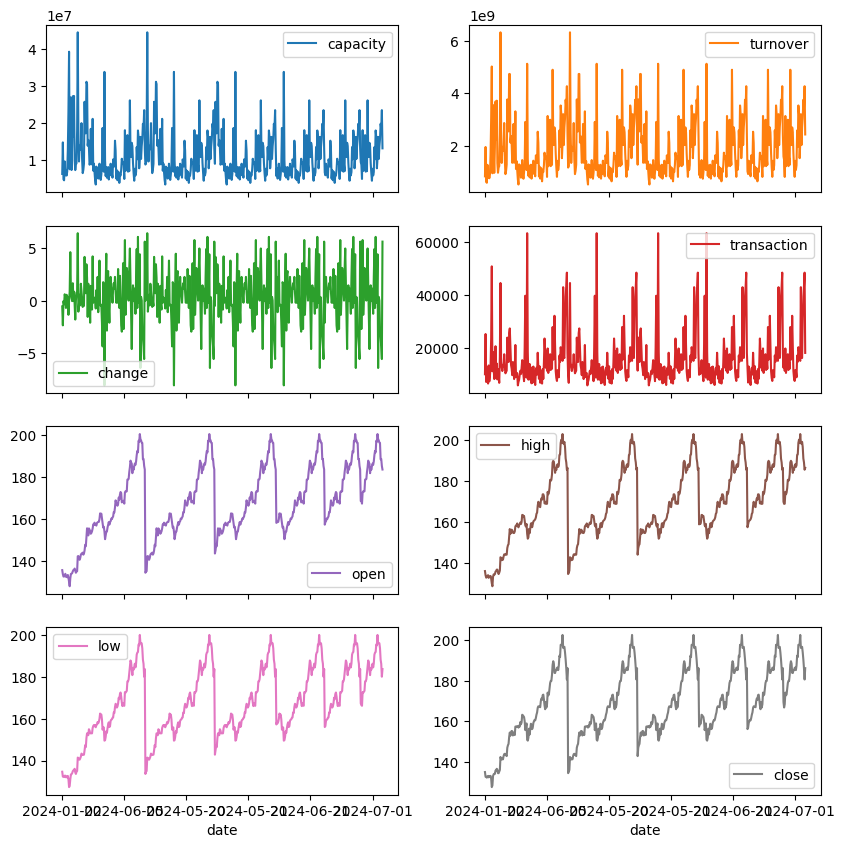

Epoch 1/100
11/11 [==============================] - 3s 55ms/step - loss: 0.0787 - val_loss: 0.0383
Epoch 2/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0354 - val_loss: 0.0224
Epoch 3/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0167 - val_loss: 0.0090
Epoch 4/100
11/11 [==============================] - 0s 16ms/step - loss: 0.0089 - val_loss: 0.0049
Epoch 5/100
11/11 [==============================] - 0s 13ms/step - loss: 0.0059 - val_loss: 0.0046
Epoch 6/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 7/100
11/11 [==============================] - 0s 15ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 8/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 9/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.0029
Epoch 10/100
11/11 [==============================] - 0s 14ms/step - loss: 0.0029 - val_loss: 0.0027

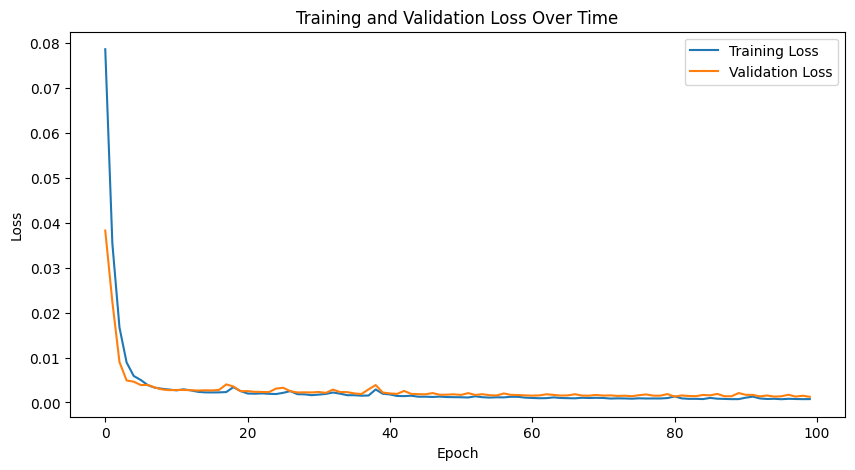

Test Loss: 0.0025
4/4 [==============================] - 0s 4ms/step


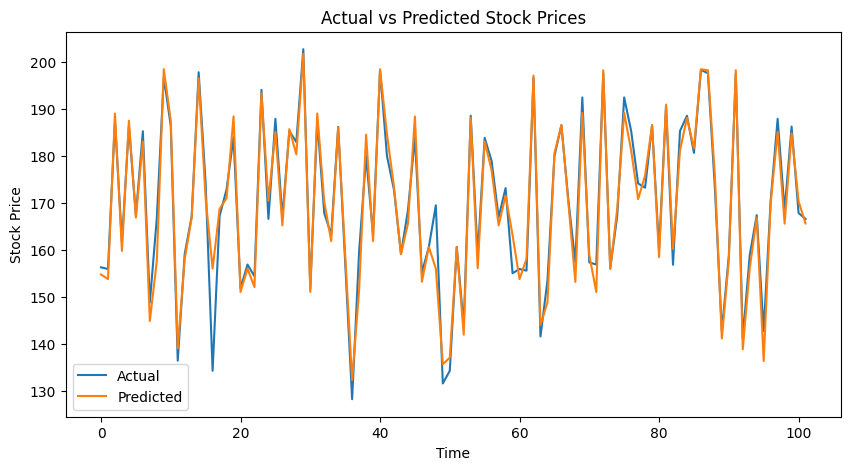

Mean Absolute Percentage Error (MAPE): 1.50%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the data
data = pd.read_csv('/content/0050.csv')

# Visualize the data
print(data.head())
data.plot(x='date', y=['capacity', 'turnover', 'change', 'transaction', 'open', 'high', 'low', 'close'], subplots=True, layout=(4, 2), figsize=(10, 10))
plt.show()

# Preprocess the data
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Select features and target
features = ['capacity', 'turnover', 'change', 'transaction', 'open', 'high', 'low']
target = 'close'

# Normalize the data
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])
target_scaler = MinMaxScaler()
data[target] = target_scaler.fit_transform(data[[target]])

# Convert to numpy arrays
X = data[features].values
y = data[target].values

# Create sequences
def create_sequences(X, y, seq_length):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_length):
        X_seq.append(X[i:i+seq_length])
        y_seq.append(y[i+seq_length])
    return np.array(X_seq), np.array(y_seq)

seq_length = 10
X_seq, y_seq = create_sequences(X, y, seq_length)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

# Define the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(features)), return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.show()

# Evaluate the model
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')

# Make predictions
test_predictions = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test.reshape(-1, 1))
test_predictions_inv = target_scaler.inverse_transform(test_predictions)

# Visualize the predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predictions_inv, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()
plt.show()

# Calculate accuracy (e.g., Mean Absolute Percentage Error)
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test_inv, test_predictions_inv)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

# If you want to save the model
model.save('stock_price_rnn.h5')